In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers import Dense 
from keras.callbacks import EarlyStopping 
#from tensorflow.keras.utils import to_categorical

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train_final = x_train.reshape((-1, 784)) /255
x_test_final = x_test.reshape((-1, 784)) /255
#y_train_final = to_categorical(y_train)
#y_test_final = to_categorical(y_test)
y_train_final = y_train
y_test_final = y_test

In [15]:
model = Sequential() 
model.add(Dense(512, kernel_initializer='normal', activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [16]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [17]:
history = model.fit(x_train_final, y_train_final, batch_size=256, epochs=50, verbose=1, validation_split = 0.2, callbacks = [EarlyStopping(monitor = 'val_loss', patience = 20)])

Epoch 1/50
188/188 [==============================] - 2s 5ms/step - loss: 0.3328 - accuracy: 0.8958 - val_loss: 0.2469 - val_accuracy: 0.9261
Epoch 2/50
188/188 [==============================] - 1s 5ms/step - loss: 0.1038 - accuracy: 0.9680 - val_loss: 0.1084 - val_accuracy: 0.9689
Epoch 3/50
188/188 [==============================] - 2s 8ms/step - loss: 0.0670 - accuracy: 0.9795 - val_loss: 0.0934 - val_accuracy: 0.9742
Epoch 4/50
188/188 [==============================] - 1s 5ms/step - loss: 0.0434 - accuracy: 0.9864 - val_loss: 0.1088 - val_accuracy: 0.9720
Epoch 5/50
188/188 [==============================] - 1s 4ms/step - loss: 0.0315 - accuracy: 0.9894 - val_loss: 0.0947 - val_accuracy: 0.9763
Epoch 6/50
188/188 [==============================] - 1s 4ms/step - loss: 0.0240 - accuracy: 0.9921 - val_loss: 0.1089 - val_accuracy: 0.9768
Epoch 7/50
188/188 [==============================] - 1s 4ms/step - loss: 0.0195 - accuracy: 0.9939 - val_loss: 0.1097 - val_accuracy: 0.9767
Epoch 

In [18]:
score = model.evaluate(x_test_final, y_test_final, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.1839071363210678
Test accuracy: 0.980400025844574


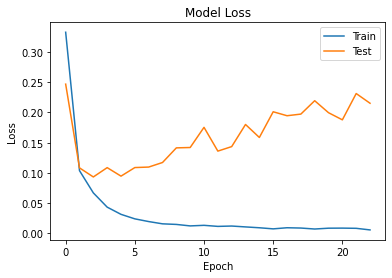

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

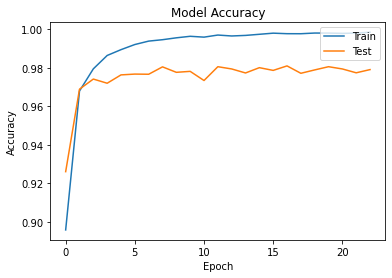

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()